<a href="https://colab.research.google.com/github/eya-abid/ExData_Plotting1/blob/master/RegressionImplementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# King County Home Sales: Analysis and the limitations of a multiple regression model

In [ ]:
import pandas as pd
# it offers data structures and operations for manipulating numerical tables and time series. 

import numpy as np
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, 
#along with a large collection of high-level mathematical functions to operate on these arrays

from sklearn.model_selection import train_test_split
#It features various classification, regression and clustering algorithms including support vector machines, 
#random forests, gradient boosting,k-means and DBSCAN, and is designed to interoperate with the Python numerical 
#and scientific libraries NumPy and SciPy.
#choosing estimators and their parameters
#Split Your Dataset With scikit-learn's train_test_split()

import matplotlib.pyplot as plt
#matplotlib.pyplot is a state-based interface to matplotlib. It provides a MATLAB-like way of plotting.
#pyplot is mainly intended for interactive plots and simple cases of programmatic plot generation:

import seaborn as sns
#Seaborn is a Python data visualization library based on matplotlib. 
#It provides a high-level interface for drawing attractive and informative statistical graphics.

from collections import Counter

#A Counter is a container that keeps track of how many times equivalent values are added. 
#It can be used to implement the same algorithms for which bag or multiset data structures are commonly 
#used in other languages.

In [ ]:
df = pd.read_csv('house_data.csv')
#Read a comma-separated values (csv) file into DataFrame.
"""DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. 
You can think of it like a spreadsheet or SQL table, or a dict of Series objects. 
It is generally the most commonly used pandas object. ... Structured or record ndarray."""

'DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. \nYou can think of it like a spreadsheet or SQL table, or a dict of Series objects. \nIt is generally the most commonly used pandas object. ... Structured or record ndarray.'

# let's do some data analysis

In [ ]:
df.head()
#lot=terrain

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


The data for these sales comes from the official public records of home sales in the King County area, Washington State. The data sets contains 21613 rows. Each represents a home sold from May 2014 through May 2015. Below is a breakdown of the variables involved:

id - Unique ID for each home sold

date - Date of the home sale

price - Price of each home sold

bedrooms - Number of bedrooms

bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower

sqft_living - Square footage of the apartments interior living space

sqft_lot - Square footage of the land space

floors - Number of floors

waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not

view - An index from 0 to 4 of how good the view of the property was

condition - An index from 1 to 5 on the condition of the apartment,

grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.

sqft_above - The square footage of the interior housing space that is above ground level

sqft_basement - The square footage of the interior housing space that is below ground level

yr_built - The year the house was initially built

yr_renovated - The year of the house’s last renovation

zipcode - What zipcode area the house is in

lat - Lattitude

long - Longitude

sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors

sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors
https://www.kaggle.com/harlfoxem/housesalesprediction/discussion/23194

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
"""
We can consider the maximum value of a distribution in another way. We can think of it as the value in a set of data
that has 100% of the observations at or below it. When we consider it in this way, we call it the 100th percentile. 
From this same perspective, the median, which has 50% of the observations at or below it, is the 50th percentile.
The pth percentile of a distribution is the value such that p percent of the observations fall at or below it.
"""

http://my.ilstu.edu/~gjin/hsc204-hed/Module-5-Summary-Measure-2/Module-5-Summary-Measure-26.html


In [ ]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

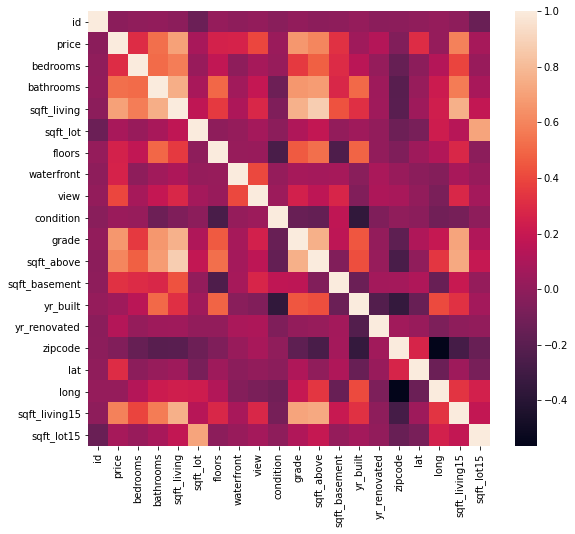

In [ ]:
plt.figure(figsize=(9,8))
sns.heatmap(df.corr())

### let's get the correlation between our features and our target "Price"

In [ ]:
pd.DataFrame(df.corr()['price']).sort_values(by='price',ascending=False)

,price
price,1.000000
sqft_living,0.702044
grade,0.667463
sqft_above,0.605566
sqft_living15,0.585374
bathrooms,0.525134
view,0.397346
sqft_basement,0.323837
bedrooms,0.308338
lat,0.306919


## let's plot some data 

### Bedrooms

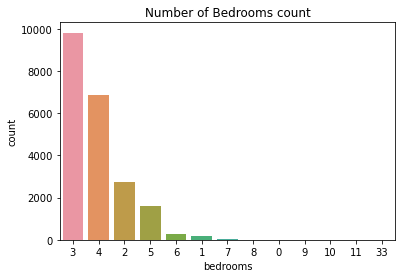

In [ ]:
sns.countplot(df.bedrooms,order=df.bedrooms.value_counts().index);
plt.title("Number of Bedrooms count");

### Bathrooms 

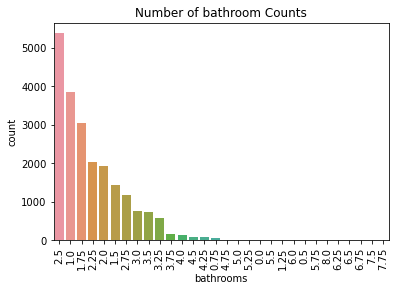

In [ ]:
plt.xticks(rotation=90)
sns.countplot(df.bathrooms,order=df.bathrooms.value_counts().index);
plt.title('Number of bathroom Counts');

# View 

Counter({0: 19489, 2: 963, 3: 510, 1: 332, 4: 319})


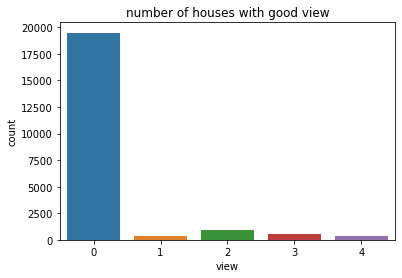

In [ ]:
print(Counter(df.view))
sns.countplot(df.view)
plt.title('number of houses with good view')
plt.show()

In [ ]:
df.view


0        0
1        0
2        0
3        0
4        0
        ..
21608    0
21609    0
21610    0
21611    0
21612    0
Name: view, Length: 21613, dtype: int64

## Sqft_living and price : price = f(sqft_living)

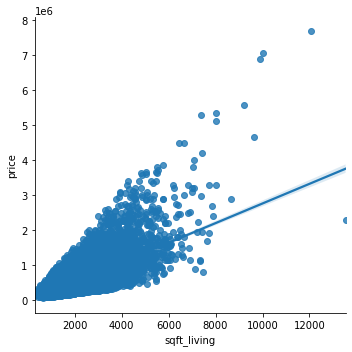

In [ ]:
sns.lmplot(x='sqft_living',y='price',data=df) 

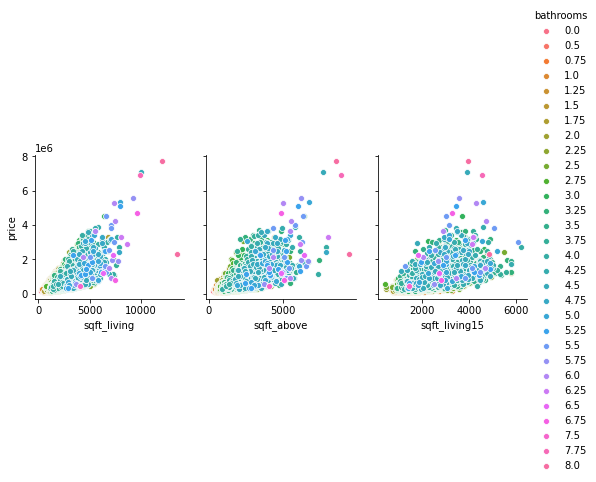

In [ ]:
sns.pairplot(df, x_vars=['sqft_living','sqft_above','sqft_living15'], y_vars=['price'],hue='bathrooms')

## let's use sqft_living to build our first Regression model 

In [ ]:
input_data = df['sqft_living'].values[:,np.newaxis]
#np.newaxis to make it a column vector
output_data = df['price'].values

In [ ]:
output_data.shape

(21613,)

In [ ]:
input_data2 = df['sqft_living']
input_data2.shape

(21613,)

![image.png](attachment:image.png)

In [ ]:
from sklearn.model_selection import train_test_split
#split our data to a train and test splits using train_test_split
X_train,X_test,y_train,y_test = train_test_split(input_data,output_data,test_size=0.2,random_state=42)
"""
random_state int, RandomState instance or None, default=None
Controls the shuffling applied to the data before applying the split. 
Pass an int for reproducible output across multiple function calls. 

"""

'\nrandom_state int, RandomState instance or None, default=None\nControls the shuffling applied to the data before applying the split. \nPass an int for reproducible output across multiple function calls. \n\n'

In [ ]:
#import our LinearRegression Model
from sklearn.linear_model import LinearRegression
#Instantiate our model 
model1 = LinearRegression()
#let's train our first model  
model1.fit(X_train,y_train)

LinearRegression()

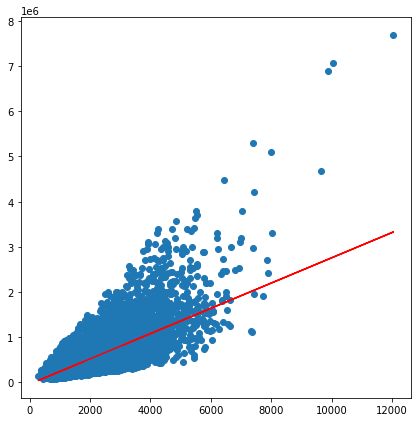

In [ ]:
plt.figure(figsize=(7,7))
plt.scatter(X_train,y_train)
plt.plot(X_train,model1.predict(X_train),"r")

In [ ]:
#model evaluation
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
#step 1 : make a prediction on the test_data
prediction1=model1.predict(X_test)
#MAE
MAE = mean_absolute_error(y_test,prediction1)
#MSE
MSE = mean_squared_error(y_test,prediction1)
#R_squared
r2 = r2_score(y_test,prediction1)

print("MAE :{:.4f}".format(MAE))
print("MSE :{:.4f}".format(MSE))
print("R2_score :{:.2f}".format(r2))

MAE :177990.7676
MSE :76570251342.0411
R2_score :0.49


https://joshlawman.com/metrics-regression/


## R2_score:
Also know as the coefficient of determination. It gives some idea of the “goodness of fit” of the model. It calculates the proportion of variance which is explained by the model. Ranges from 0 to 1 where perfect explanation is denoted with a 1.

## let's try it using the top 4 most correlated features with our target "Price" 

In [ ]:
input_data2 = df[['sqft_living','grade','sqft_above']]
print(input_data2)

       sqft_living  grade  sqft_above
0             1180      7        1180
1             2570      7        2170
2              770      6         770
3             1960      7        1050
4             1680      8        1680
...            ...    ...         ...
21608         1530      8        1530
21609         2310      8        2310
21610         1020      7        1020
21611         1600      8        1600
21612         1020      7        1020

[21613 rows x 3 columns]


In [ ]:
#split our data to a train and test splits using train_test_split
X_train,X_test,y_train,y_test = train_test_split(input_data2,output_data,test_size=0.2,random_state=42)

In [ ]:
#Instantiate our model 
model2 = LinearRegression()
model2.fit(X_train,y_train)

LinearRegression()

In [ ]:
#step 1 : make a prediction on the test_data
prediction1=model2.predict(X_test)
#MAE
MAE = mean_absolute_error(y_test,prediction1)
#MSE
MSE = mean_squared_error(y_test,prediction1)
#R_squared
r2 = r2_score(y_test,prediction1)

print("MAE :{:.2f}".format(MAE))
print("MSE :{:.2f}".format(MSE))
print("R2_score :{:.2f}".format(r2))

MAE :165970.98
MSE :69066197123.77
R2_score :0.54


# And finally let's try it using ALL possible feature

In [ ]:
features = [i for i in list(df) if i not in ['id','date','price']]
print(features)
label = "price"

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


In [ ]:
input_data3 = df[features] 
#split our data to a train and test splits using train_test_split
X_train,X_test,y_train,y_test = train_test_split(input_data3,df["price"],test_size=0.2,random_state=42)

In [ ]:
#Instantiate our model 
model3 = LinearRegression()
model3.fit(X_train,y_train)

LinearRegression()

In [ ]:
#step 1 : make a prediction on the test_data
prediction3=model3.predict(X_test)
#MAE
MAE = mean_absolute_error(y_test,prediction3)
#MSE
MSE = mean_squared_error(y_test,prediction3)
#R_squared
r2 = r2_score(y_test,prediction3)

print("MAE :{:.2f}".format(MAE))
print("MSE :{:.2f}".format(MSE))
print("R2_score :{:.2f}".format(r2))

MAE :127610.70
MSE :45224874244.73
R2_score :0.70


## Let's try some feature engeneering to improve the performance

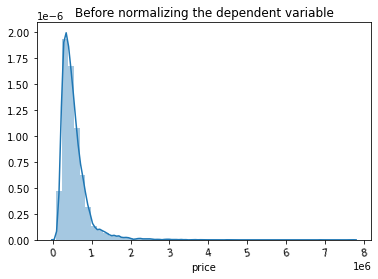

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(df['price']);
plt.xticks(rotation=10);
plt.title("Before normalizing the dependent variable");

In [ ]:
test = np.log(df['price'])

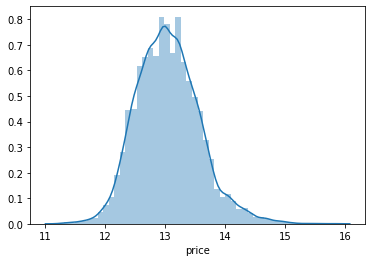

In [ ]:
sns.distplot(test)

![image.png](attachment:image.png)

In [ ]:
output = test.copy()

# And let's extract the old of purchace

In [ ]:
def extract(year):
    year = list(year)
    for i in range(len(year)):
        year[i]=2021-year[i]
    return year    

In [ ]:
df['old']=extract(df['yr_built'])

In [ ]:
df.old

0        66
1        70
2        88
3        56
4        34
         ..
21608    12
21609     7
21610    12
21611    17
21612    13
Name: old, Length: 21613, dtype: int64

In [ ]:
pd.DataFrame(df.corr())

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,old
id,1.000000,-0.016797,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,...,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798,-0.021380
price,-0.016797,1.000000,0.308338,0.525134,0.702044,0.089655,0.256786,0.266331,0.397346,0.036392,...,0.605566,0.323837,0.053982,0.126442,-0.053168,0.306919,0.021571,0.585374,0.082456,-0.053982
bedrooms,0.001286,0.308338,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,...,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244,-0.154178
bathrooms,0.005160,0.525134,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,...,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175,-0.506019
sqft_living,-0.012258,0.702044,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,...,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286,-0.318049
sqft_lot,-0.132109,0.089655,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,...,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557,-0.053080
floors,0.018525,0.256786,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,...,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269,-0.489319
waterfront,-0.002721,0.266331,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,...,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703,0.026161
view,0.011592,0.397346,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,...,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575,0.053440
condition,-0.023783,0.036392,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,...,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406,0.361417


In [ ]:
features = [i for i in list(df) if i not in ['id','price','date','yr_built']]

In [ ]:
input_data = df[features]
#split our data to a train and test splits using train_test_split
X_train,X_test,y_train,y_test = train_test_split(input_data,output,test_size=0.2,random_state=42)

In [ ]:
#Instantiate our model 
model3 = LinearRegression()
model3.fit(X_train,y_train)

LinearRegression()

In [ ]:
#step 1 : make a prediction on the test_data
prediction3=model3.predict(X_test)
#MAE
MAE = mean_absolute_error(y_test,prediction3)
#MSE
MSE = mean_squared_error(y_test,prediction3)
#R_squared
r2 = r2_score(y_test,prediction3)

print("MAE :{:.2f}".format(MAE))
print("MSE :{:.2f}".format(MSE))
print("R2_score :{:.2f}".format(r2))

MAE :0.20
MSE :0.07
R2_score :0.77
